In [1]:
import yaml
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
from martignac.workflows.solute_generation import SoluteGenFlow
from martignac.nomad.workflows import NomadWorkflow
from martignac.nomad.uploads import get_upload_by_id
from martignac.nomad.datasets import get_dataset_by_id
from martignac.nomad.users import get_user_by_id

24-03-05 15:53:20 - MDAnalysis.coordinates.AMBER - WARNING - netCDF4 is not available. Writing AMBER ncdf files will be slow.


In [18]:
dataset = get_dataset_by_id("HJdEI1q4SV-c5Di43BTT_Q", use_prod=False)
dataset

24-03-05 15:57:26 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/datasets/?dataset_id=HJdEI1q4SV-c5Di43BTT_Q&page_size=10
24-03-05 15:57:26 - martignac.nomad.users - INFO - retrieving user 30d3a108-d2cc-45ec-9ddb-0c1dc6a2c99b on prod server
24-03-05 15:57:26 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/users/30d3a108-d2cc-45ec-9ddb-0c1dc6a2c99b


NomadDataset(dataset_id='HJdEI1q4SV-c5Di43BTT_Q', dataset_create_time=datetime.datetime(2024, 2, 14, 9, 39, 55, 876000), dataset_name='Martignac test dataset', dataset_type='DatasetType.owned', dataset_modified_time=datetime.datetime(2024, 2, 14, 9, 39, 55, 876000), user=NomadUser(name='Tristan Bereau'), doi=None, pid=None, m_annotations=None)

In [19]:
pprint(dataset)

NomadDataset(dataset_id='HJdEI1q4SV-c5Di43BTT_Q',
             dataset_create_time=datetime.datetime(2024, 2, 14, 9, 39, 55, 876000),
             dataset_name='Martignac test dataset',
             dataset_type='DatasetType.owned',
             dataset_modified_time=datetime.datetime(2024, 2, 14, 9, 39, 55, 876000),
             user=NomadUser(name='Tristan Bereau'),
             doi=None,
             pid=None,
             m_annotations=None)


In [21]:
project = SoluteGenFlow.get_project()
project

,sp.type,sp.solute_name,doc.solute_itp,doc.solute_top,doc.solute_name,doc.gromacs_logs,doc.solute_gro,doc.nomad_workflow,doc.nomad_dataset_id,doc.nomad_upload_id
bc3c7ca12d4e7b0fa984e8cbb813acbf,solute,P6,solute.itp,solute.top,P6,{'SoluteGenFlow': {'minimize': 'solute_min.log'}},solute_min.gro,{'SoluteGenFlow': 'solute_generation.archive.y...,HJdEI1q4SV-c5Di43BTT_Q,LSfEAvdkTwucpZVr-hY1VA


In [22]:
jobs = list(project.find_jobs())
jobs

[Job(project=SoluteGenFlow('/Users/bereau/work/projects/martignac/scripts/martini_solute_gen'), statepoint={'type': 'solute', 'solute_name': 'P6'})]

In [23]:
job = jobs[0]
job

Job(project=SoluteGenFlow('/Users/bereau/work/projects/martignac/scripts/martini_solute_gen'), statepoint={'type': 'solute', 'solute_name': 'P6'})

In [24]:
job.sp

{'type': 'solute', 'solute_name': 'P6'}

In [25]:
job.id

'bc3c7ca12d4e7b0fa984e8cbb813acbf'

In [26]:
job.document

{'solute_itp': 'solute.itp', 'solute_top': 'solute.top', 'solute_name': 'P6', 'gromacs_logs': {'SoluteGenFlow': {'minimize': 'solute_min.log'}}, 'solute_gro': 'solute_min.gro', 'nomad_workflow': {'SoluteGenFlow': 'solute_generation.archive.yaml'}, 'nomad_dataset_id': 'HJdEI1q4SV-c5Di43BTT_Q', 'nomad_upload_id': 'LSfEAvdkTwucpZVr-hY1VA'}

In [27]:
job

Job(project=SoluteGenFlow('/Users/bereau/work/projects/martignac/scripts/martini_solute_gen'), statepoint={'type': 'solute', 'solute_name': 'P6'})

In [28]:
workflow = NomadWorkflow(project, jobs[0])
workflow

NomadWorkflow(project=SoluteGenFlow('/Users/bereau/work/projects/martignac/scripts/martini_solute_gen'), job=Job(project=SoluteGenFlow('/Users/bereau/work/projects/martignac/scripts/martini_solute_gen'), statepoint={'type': 'solute', 'solute_name': 'P6'}))

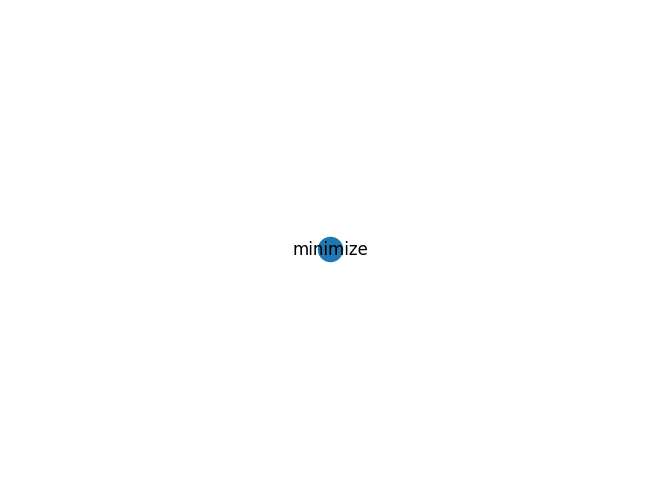

In [29]:
graph = workflow.graph
nx.draw(graph, with_labels=True)
plt.show()

In [30]:
nomad_upload = get_upload_by_id(job.document["nomad_upload_id"])
pprint(nomad_upload)

24-03-05 15:59:17 - martignac.nomad.uploads - INFO - retrieving upload LSfEAvdkTwucpZVr-hY1VA on test server
24-03-05 15:59:17 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/LSfEAvdkTwucpZVr-hY1VA
24-03-05 15:59:17 - martignac.nomad.users - INFO - retrieving user 7c85bdf1-8b53-40a8-81a4-04f26ff56f29 on prod server
24-03-05 15:59:17 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/users/7c85bdf1-8b53-40a8-81a4-04f26ff56f29


NomadUpload(upload_id='LSfEAvdkTwucpZVr-hY1VA',
            upload_create_time=datetime.datetime(2024, 3, 5, 14, 57, 50, 630000),
            main_author=NomadUser(name='Tristan Bereau'),
            process_running=False,
            current_process='process_upload',
            process_status='SUCCESS',
            last_status_message='Process process_upload completed successfully',
            errors=[],
            warnings=[],
            complete_time=datetime.datetime(2024, 3, 5, 14, 57, 52, 520000),
            coauthors=['7c85bdf1-8b53-40a8-81a4-04f26ff56f29'],
            coauthor_groups=[],
            reviewers=[],
            reviewer_groups=[],
            writers=[NomadUser(name='Joseph Rudzinski'),
                     NomadUser(name='Tristan Bereau')],
            writer_groups=[],
            viewers=[NomadUser(name='Joseph Rudzinski'),
                     NomadUser(name='Tristan Bereau')],
            viewer_groups=[],
            published=False,
            publis

In [23]:
nomad_upload.entries

2